
=== Frequência de Atividade_Semana ===


,Frequência Absoluta,Frequência Relativa (%)
Atividade_Semana,,
Não pratico,8,40.0
5 vezes por semana,5,25.0
4 vezes por semana,5,25.0
3 vezes por semana,1,5.0
6 vezes por semana,1,5.0


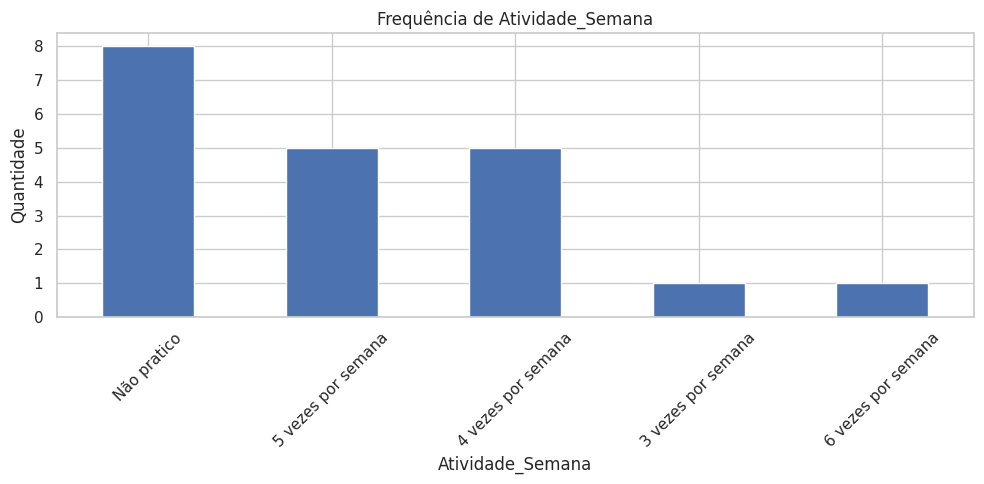


=== Frequência de Tipo_Atividade ===


,Frequência Absoluta,Frequência Relativa (%)
Tipo_Atividade,,
Não pratico,7,35.0
Musculação,6,30.0
Caminhada,3,15.0
Bicicleta,1,5.0
Exercícios funcionais,1,5.0
Corrida,1,5.0
Aeróbico,1,5.0


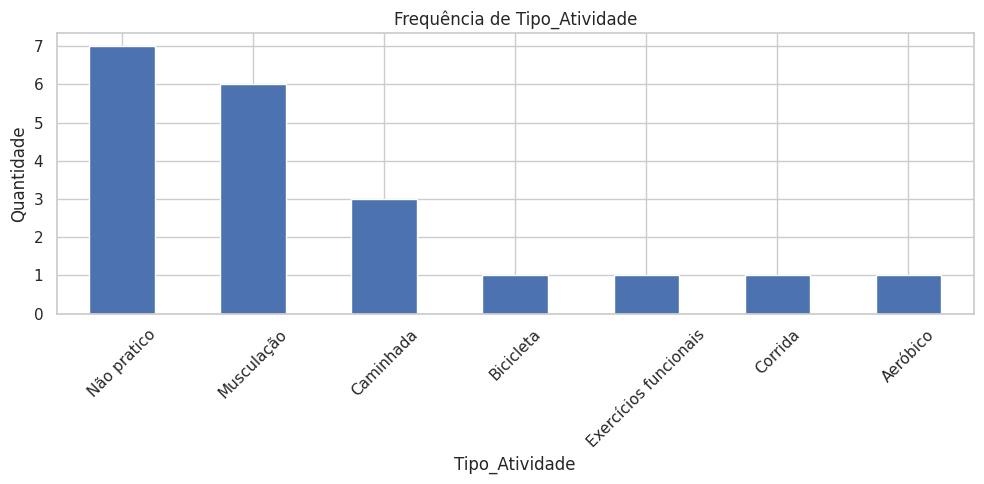


=== Frequência de Horario_Exercicio ===


,Frequência Absoluta,Frequência Relativa (%)
Horario_Exercicio,,
Não me exercito,7,35.0
Manhã,5,25.0
Tarde,5,25.0
Noite,3,15.0


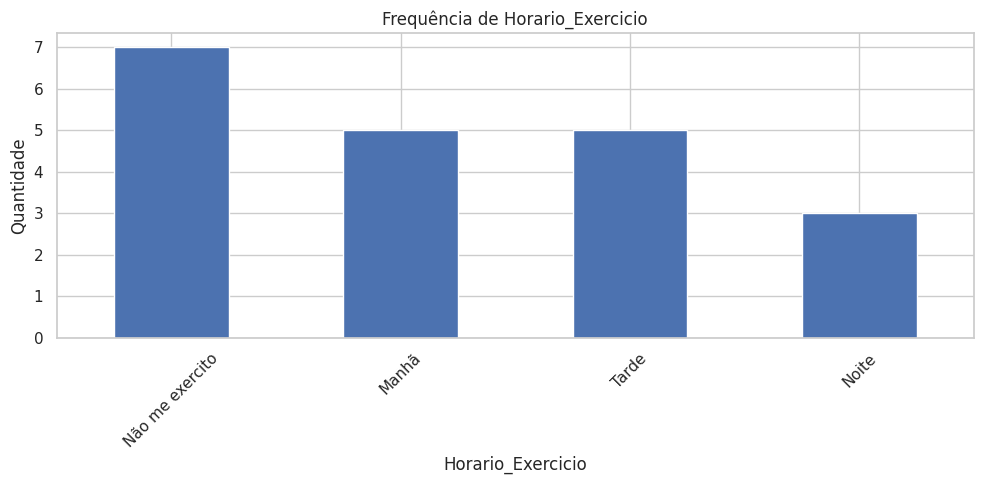


=== Frequência de Sensacao_Sono ===


,Frequência Absoluta,Frequência Relativa (%)
Sensacao_Sono,,
Profundo,12,60.0
Moderado,6,30.0
Leve,2,10.0


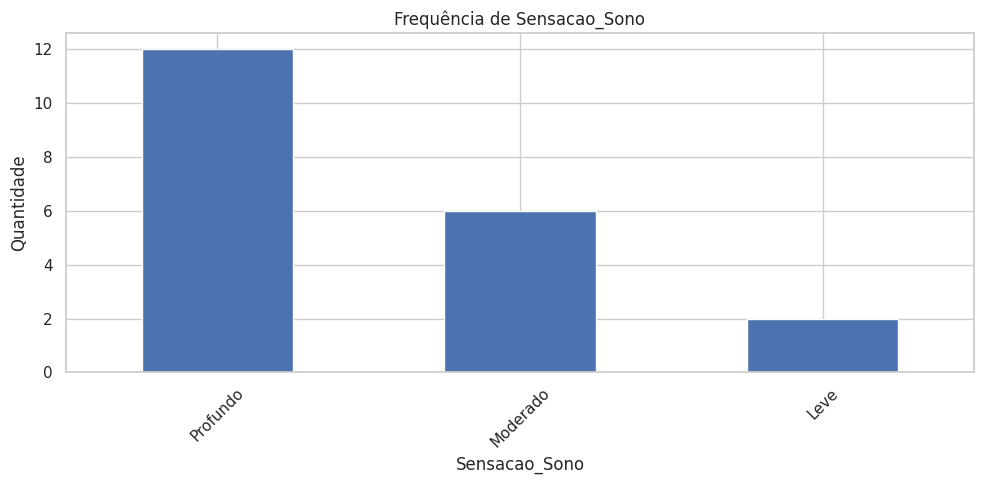


=== Frequência de Frequencia_Acorda ===


,Frequência Absoluta,Frequência Relativa (%)
Frequencia_Acorda,,
Raramente,11,55.0
Frequentemente,5,25.0
Nunca,3,15.0
Todas as noites,1,5.0


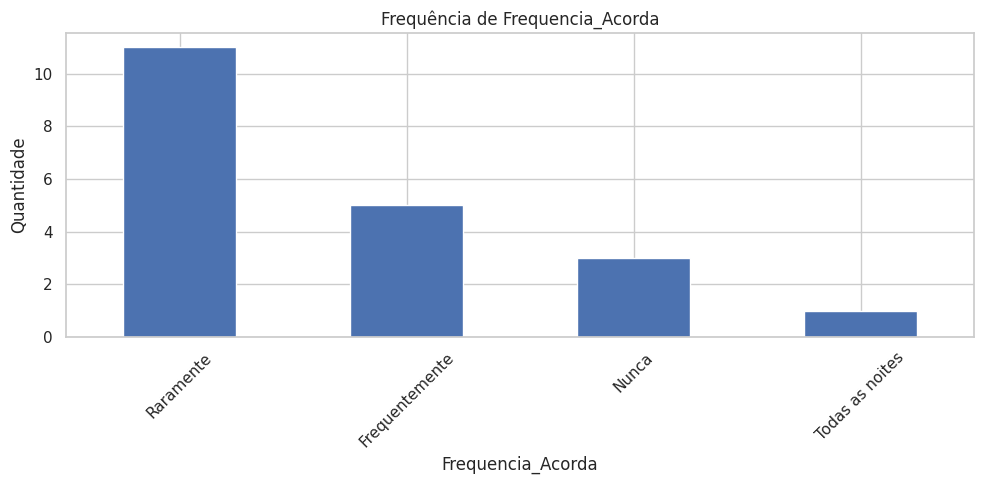


=== Frequência de Exercicio_Melhora_Sono ===


,Frequência Absoluta,Frequência Relativa (%)
Exercicio_Melhora_Sono,,
Sim,12,60.0
Não sei dizer,8,40.0


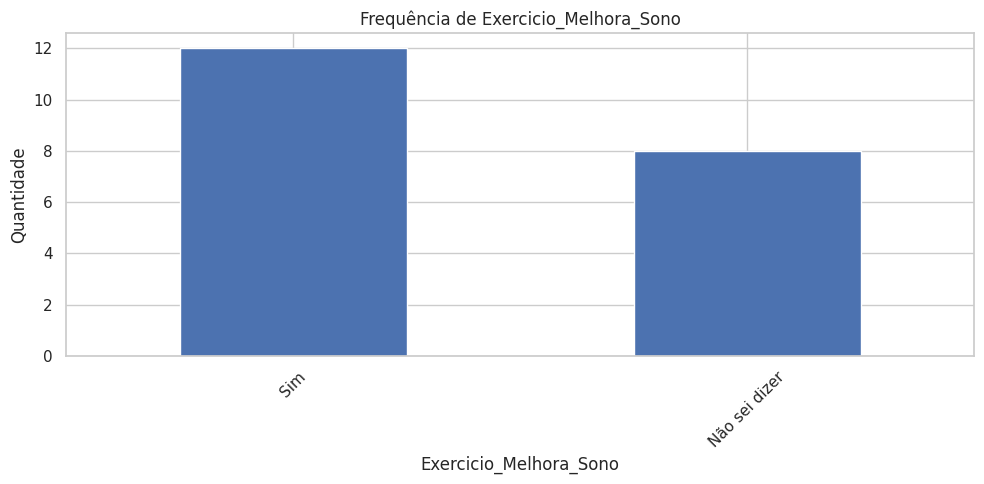


=== Frequência de Qualidade_Sono ===


,Frequência Absoluta,Frequência Relativa (%)
Qualidade_Sono,,
Média,10,50.0
Baixa,7,35.0
Alta,3,15.0


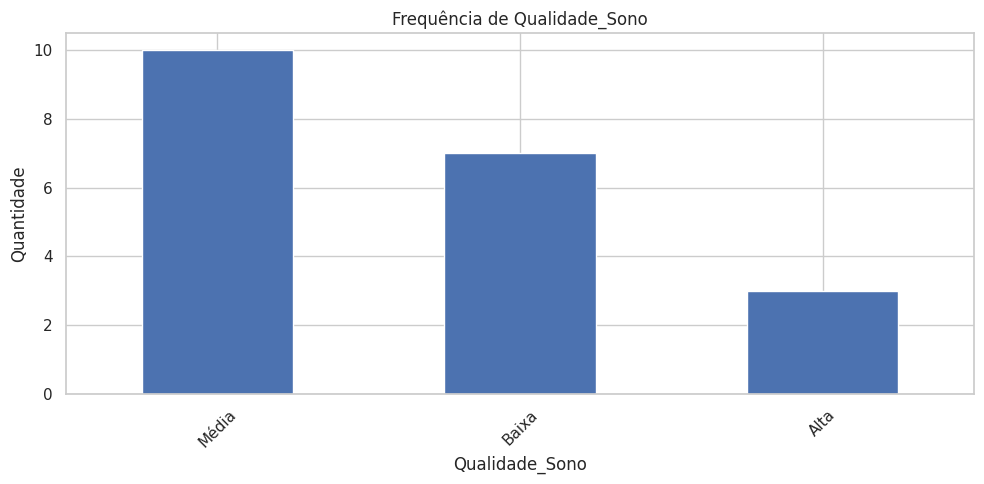


=== Estatísticas de Duracao_Sessao ===


,Estatística,Duracao_Sessao
0,Média,40.79
1,Mediana,50.00
2,Moda,0.0
3,Desvio Padrão,36.22


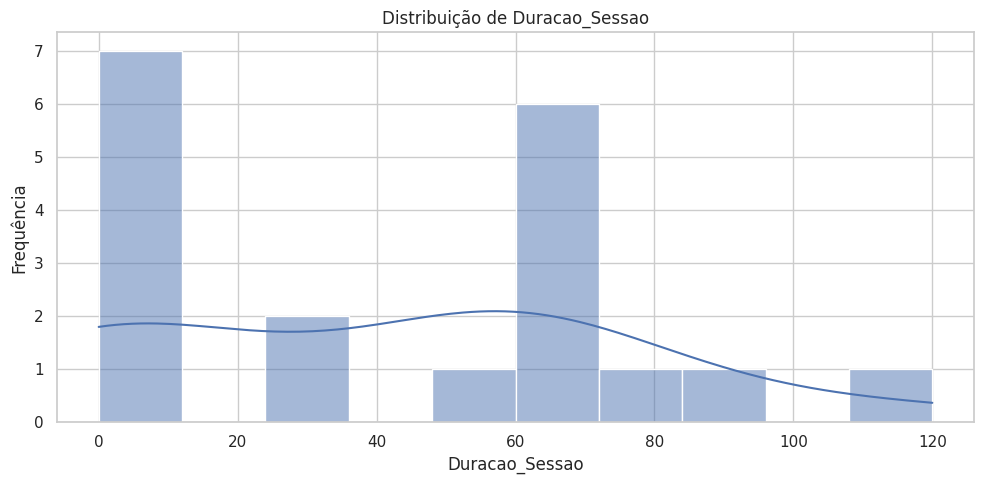


=== Estatísticas de Horas_Sono ===


,Estatística,Horas_Sono
0,Média,6.40
1,Mediana,6.50
2,Moda,7
3,Desvio Padrão,0.82


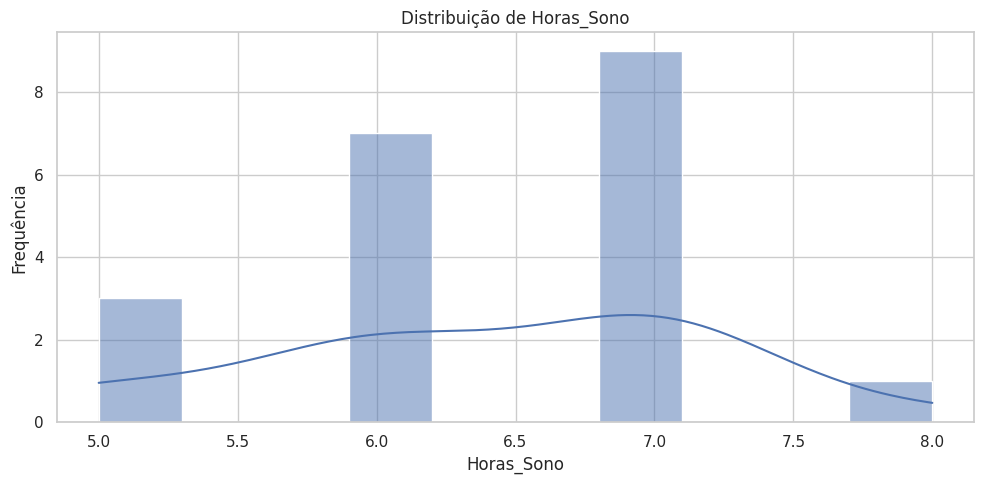


=== Qualidade do sono por frequência de exercício ===


Qualidade_Sono,Alta,Baixa,Média
Atividade_Semana,,,
3 vezes por semana,100.0,0.0,0.0
4 vezes por semana,20.0,20.0,60.0
5 vezes por semana,0.0,40.0,60.0
6 vezes por semana,100.0,0.0,0.0
Não pratico,0.0,50.0,50.0


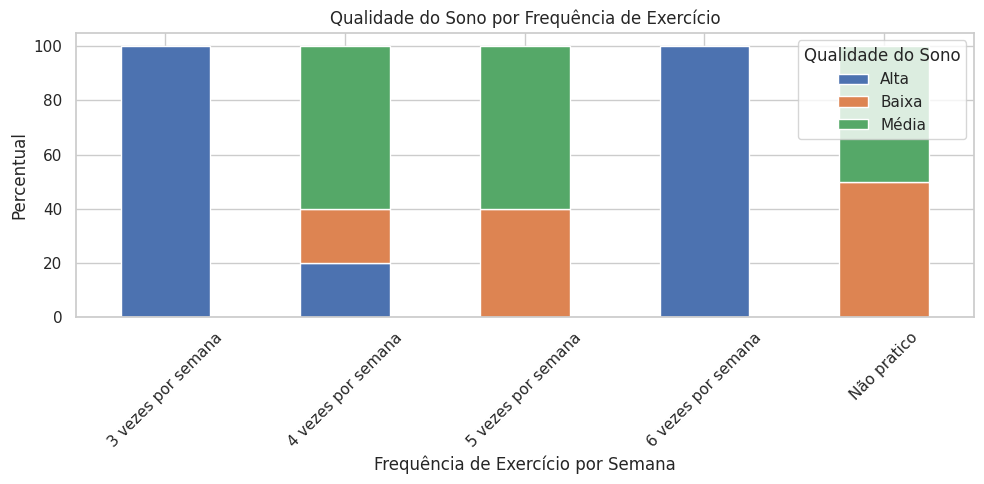

In [15]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.parse
from statistics import mode
from IPython.display import display

# Configura visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Lê os dados do Google Sheets
sheet_id = "14BFx84PJvHuhj317t5O7JVszakW6pnJ4HfzgufprnOg"
sheet_name = "Página1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={urllib.parse.quote(sheet_name)}"

df = pd.read_csv(url, encoding='utf-8')

# Renomeia colunas
df.columns = [
    "TimeStamp",
    "Nome",
    "Atividade_Semana",
    "Tipo_Atividade",
    "Duracao_Sessao",
    "Horario_Exercicio",
    "Horas_Sono",
    "Sensacao_Sono",
    "Frequencia_Acorda",
    "Exercicio_Melhora_Sono",
    "Qualidade_Sono"
]

# ------------------------------
# NORMALIZAÇÃO de entradas textuais
# ------------------------------
def normalizar_texto(valor):
    if pd.isna(valor):
        return valor
    valor = str(valor).strip().lower()
    if valor in ["nenhum", "não pratico", "nao pratico", "nao pratico.", "não pratico.", "n"]:
        return "Não pratico"
    if valor in ["sim", "yes", "s"]:
        return "Sim"
    if valor in ["não", "nao"]:
        return "Não"
    return valor.capitalize()

colunas_para_normalizar = [
    "Atividade_Semana", "Tipo_Atividade", "Horario_Exercicio",
    "Sensacao_Sono", "Frequencia_Acorda", "Exercicio_Melhora_Sono", "Qualidade_Sono"
]

for col in colunas_para_normalizar:
    df[col] = df[col].apply(normalizar_texto)

# ------------------------------
# FREQUÊNCIA (colunas qualitativas)
# ------------------------------
for col in colunas_para_normalizar:
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True) * 100
    freq_table = pd.DataFrame({
        "Frequência Absoluta": freq_abs,
        "Frequência Relativa (%)": freq_rel.round(2)
    })
    print(f"\n=== Frequência de {col} ===")
    display(freq_table)

    freq_abs.plot(kind="bar", title=f"Frequência de {col}")
    plt.ylabel("Quantidade")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ------------------------------
# MÉDIA, MEDIANA, MODA E DESVIO PADRÃO (colunas quantitativas)
# ------------------------------
quantitativas = ["Duracao_Sessao", "Horas_Sono"]

for col in quantitativas:
    media = df[col].mean()
    mediana = df[col].median()
    try:
        moda = mode(df[col])
    except:
        moda = "Múltiplos valores"
    desvio = df[col].std()

    stats_table = pd.DataFrame({
        "Estatística": ["Média", "Mediana", "Moda", "Desvio Padrão"],
        col: [f"{media:.2f}", f"{mediana:.2f}", moda, f"{desvio:.2f}"]
    })

    print(f"\n=== Estatísticas de {col} ===")
    display(stats_table)

    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

# ------------------------------
# Cruzamento: atividade física e qualidade do sono
# ------------------------------
print("\n=== Qualidade do sono por frequência de exercício ===")
cross = pd.crosstab(df["Atividade_Semana"], df["Qualidade_Sono"], normalize="index") * 100
display(cross.round(1))

cross.plot(kind="bar", stacked=True)
plt.title("Qualidade do Sono por Frequência de Exercício")
plt.ylabel("Percentual")
plt.xlabel("Frequência de Exercício por Semana")
plt.xticks(rotation=45)
plt.legend(title="Qualidade do Sono")
plt.tight_layout()
plt.show()
